In [2]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import math
import matplotlib.pyplot as plt
import keras
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [3]:
from google.colab import files

uploaded = files.upload()

Saving test_X_r3mO2IZ.csv to test_X_r3mO2IZ.csv


In [16]:
df = pd.read_csv("test_X_r3mO2IZ.csv")
df.head()

ID  DATASET  ...  POSITION   VALUE
0  DATA_0000_MODEL_0000_TIME_0000_POS_0000        0  ...         0  0.1024
1  DATA_0000_MODEL_0000_TIME_0000_POS_0001        0  ...         1  0.0171
2  DATA_0000_MODEL_0000_TIME_0000_POS_0002        0  ...         2 -0.1838
3  DATA_0000_MODEL_0000_TIME_0000_POS_0003        0  ...         3 -0.3251
4  DATA_0000_MODEL_0000_TIME_0000_POS_0004        0  ...         4 -0.0652

[5 rows x 6 columns]

In [24]:
raw_seq = np.array(df['VALUE'])

In [25]:
raw_seq = raw_seq.tolist()

In [26]:
n_steps = 15
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [27]:
X.shape

(1421553, 15, 1)

In [28]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model

In [29]:
model.fit(X, y, epochs=20, verbose=1)

Epoch 1/20
44424/44424 [==============================] - 729s 16ms/step - loss: 0.6915
Epoch 2/20
44424/44424 [==============================] - 718s 16ms/step - loss: 0.6104
Epoch 3/20
44424/44424 [==============================] - 676s 15ms/step - loss: 0.5586
Epoch 4/20
44424/44424 [==============================] - 689s 15ms/step - loss: 0.5125
Epoch 5/20
44424/44424 [==============================] - 687s 15ms/step - loss: 0.4775
Epoch 6/20
44424/44424 [==============================] - 680s 15ms/step - loss: 0.4531
Epoch 7/20
44424/44424 [==============================] - 673s 15ms/step - loss: 0.4326
Epoch 8/20
44424/44424 [==============================] - 675s 15ms/step - loss: 0.4192
Epoch 9/20
44424/44424 [==============================] - 681s 15ms/step - loss: 0.4082
Epoch 10/20
44424/44424 [==============================] - 679s 15ms/step - loss: 0.3967
Epoch 11/20
44424/44424 [==============================] - 676s 15ms/step - loss: 0.3875
Epoch 12/20
44424/44424 [=====

In [30]:
from google.colab import files

uploaded = files.upload()

Saving X_sample.csv to X_sample.csv


In [48]:
test = pd.read_csv("X_sample.csv")
test.head()

ID  DATASET  ...  POSITION   VALUE
0  DATA_0000_MODEL_0000_TIME_0000_POS_0000        0  ...         0  0.4539
1  DATA_0000_MODEL_0000_TIME_0000_POS_0001        0  ...         1  0.4126
2  DATA_0000_MODEL_0000_TIME_0000_POS_0002        0  ...         2  0.2572
3  DATA_0000_MODEL_0000_TIME_0000_POS_0003        0  ...         3  0.1897
4  DATA_0000_MODEL_0000_TIME_0000_POS_0004        0  ...         4  0.3569

[5 rows x 6 columns]

In [72]:
x_input = np.array(test['VALUE'])
Example = []
for i in range(n_steps):
  Example.append(x_input[i])
Example = np.array(Example)

In [73]:
n_steps = 15
# split into samples
x_input, ytest = split_sequence(x_input, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

In [67]:
NewArray = x_input[:-72]
NewArray.shape
NewArray = NewArray.reshape(15,200)

In [68]:
NewArray.shape

(15, 200)

In [74]:
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.14259326]
 [0.28737503]
 [0.47857475]
 ...
 [0.13701242]
 [0.2175914 ]
 [0.27859008]]


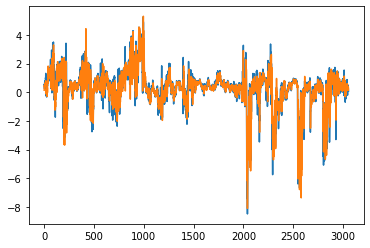

In [75]:
import matplotlib.pyplot as plt
plt.plot(ytest)
plt.plot(yhat)
plt.show()